In [1]:
import sys
sys.path.append("..")

import os
import glob

%load_ext autoreload
%autoreload 2

from sicm.sicm import LockIn

In [2]:
parent = "S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation"
files = glob.glob(parent + "/*/dev662_demods_[0-9]_sample_00000.csv")
files

['S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\\sweep_1MOhm_range1_100mV_2long50OhmCables_for_real_000\\dev662_demods_3_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\\sweep_1MOhm_range1_100mV_2long50OhmCables_for_real_through_fork_000\\dev662_demods_3_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\\sweep_1MOhm_range1_100mV_2long75OhmCables_000\\dev662_demods_3_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\\sweep_1MOhm_range1_100mV_short50OhmCable_000\\dev662_demods_3_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\\sweep_1MOhm_range1_500mV_2long50OhmCables_for_real_000\\dev662_demods_3_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\\sweep_1MOhm_range1_500mV_2long50OhmCables_for_real_through_fork_000\\dev662_demods_3_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\\sweep_1MOhm_r

In [3]:
# 0 ... sweep_1MOhm_range1_100mV_2long50OhmCables_for_real_000
# 1 ... sweep_1MOhm_range1_100mV_2long75OhmCables_000
# 3 ...sweep_1MOhm_range1_500mV_2long50OhmCables_for_real_000
# 5 ... sweep_1MOhm_range1_100mV_2long50OhmCables_for_real_through_fork_000
# 7 ... sweep_1MOhm_range1_100mV_short50OhmCable_000
# 9 ... sweep_1MOhm_range1_500mV_short50OhmCable_000

idx = 3
datadir = os.path.dirname(files[idx])
file = os.path.basename(files[idx])
print("Using data from {}.".format(datadir))

Using data from S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation\sweep_1MOhm_range1_100mV_short50OhmCable_000.


The resistance of the cable is probably 75 Ohm [[1]](https://www.audiosource.ch/cablage/cables-bnc/bnck-0015bl.html).

What works:

1) guess = [1, .1, .1, .1] , this works with frange = [1e4, 6e4], method = "lm", idx = 0, Z = 50

2) guess = [1e6, 20e-12, .1], frange = [1e4, 1e5]. method = lm, idx = 0, Z = 100)

3) guess = [1e6, 20e-12, .1], frange = [1e4, 1e5], method = lm, idx = 9, Z = 50

4) guess = [1, .1, .1,], frange = [1e4, 5e5], method = lm, idx = 9, Z = 50

5) guess = [1e6, 20e-12, .1]. frange = [1e4, 1e5], method = lm, idx =9, 

6) guess=(.01, 10, 500e3\*2\*np.pi, 1), franeg=[0,-1], method=dogbox,
idx=7, Z = 50, using lorentzian_fun)

**7)guess=[9e5, 2.5, 55e4*2*np.pi, 1e-2], frange=None,method=lm,idx=7,Z=50, using lorentzian fun)**


Exctracting chunk 0 from file S:\UsersData\Martin\2018\12_Dec\17\lockin_characterisation\sweep_1MOhm_range1_100mV_short50OhmCable_000\dev662_demods_3_sample_00000.csv.
Experiment time: 17/12/2018 08:00, # of points: 1000


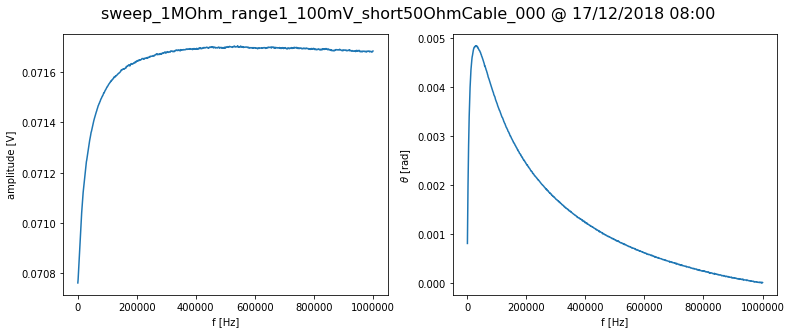

Fitting function to 1000 datapoints ...
Found parameters: [ 9.59487893e+05  2.79968551e+00  3.29954081e+06 -1.42472203e-01].
Finished in 0.022 s


In [4]:
lockin = LockIn(datadir, file)

lockin.plot(xlog = False)

lockin.trim_to_freq(frange = None)
from math import ceil
import numpy as np

V_out = ceil(1e5*(max(lockin.data["r"]) * np.sqrt(2)))/1e5
guess = [9e5, 2.5, 55e4*2*np.pi, 1e-2]
lockin.get_internal_impedance(V_out, guess, Z = 50)

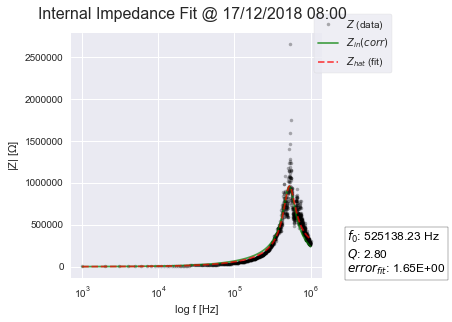

Impedance at working frequency: 21463.0847.


In [5]:
# lockin.popt = [ 9.595e05,  2.8,  3.3e6, 1e-4]
lockin.plot_fit(xlog = True, double_ax = False, plot_range = None)
print("Impedance at working frequency: {:.4f}.".format(lockin.predict(32768)))

#  fit to the fork data
Now lets say that you try to  fit to the fork data, using the impedance you have found previously.

In [7]:
# idx = 5
parent = "S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation"
files = glob.glob(parent + "/sweep_1MOhm_range1_100mV_2long50OhmCables_for_real_through_fork_000/dev662_demods_[0-9]_sample_00000.csv")
idx = 0
files

['S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation/sweep_1MOhm_range1_100mV_2long50OhmCables_for_real_through_fork_000\\dev662_demods_3_sample_00000.csv']

Using data from S:/UsersData/Martin/2018/12_Dec/17/lockin_characterisation/sweep_1MOhm_range1_100mV_2long50OhmCables_for_real_through_fork_000.
Exctracting chunk 0 from file S:\UsersData\Martin\2018\12_Dec\17\lockin_characterisation\sweep_1MOhm_range1_100mV_2long50OhmCables_for_real_through_fork_000\dev662_demods_3_sample_00000.csv.
Experiment time: 17/12/2018 08:20, # of points: 1000


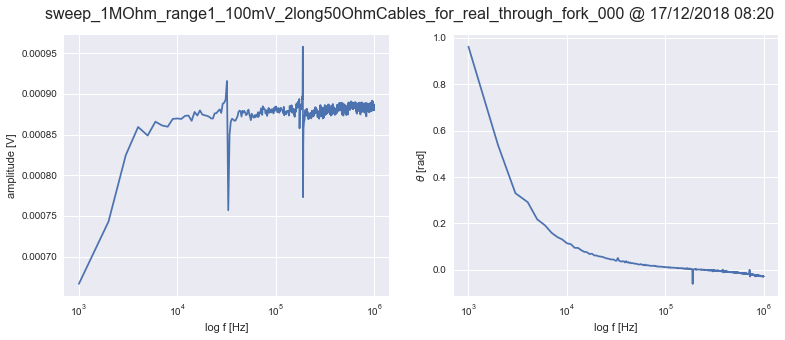

In [8]:
datadir = os.path.dirname(files[idx])
file = os.path.basename(files[idx])
print("Using data from {}.".format(datadir))

lockin_osc = LockIn(datadir, file)

lockin_osc.plot(xlog = True)

In [17]:
import numpy as np
guess = (4e5, 2.2, 596e3*2*np.pi, 1e-1)
osc_dict = lockin.characterize_oscillator(lockin_osc.data, guess)

Fitting function to 1000 datapoints ...
Found parameters: [5.18795845e+05 2.78917357e+00 3.29397447e+06 2.50608036e-03].
Finished in 0.003 s
> c:\users\mholub\git\sicm\sicm\experiments\lockin.py(425)characterize_oscillator()
-> x = np.append(x, [32688])
(Pdb) n
> c:\users\mholub\git\sicm\sicm\experiments\lockin.py(426)characterize_oscillator()
-> z_hat = fun(x, *popt)
(Pdb) n
> c:\users\mholub\git\sicm\sicm\experiments\lockin.py(428)characterize_oscillator()
-> z_hat_corr = analysis.Fitter.apply_correction(self, f = x, r_e = z_hat, popt = popt)
(Pdb) z_hat[-1]
11669.012448540678
(Pdb) n
> c:\users\mholub\git\sicm\sicm\experiments\lockin.py(429)characterize_oscillator()
-> osc_dict = {   "y_hat": z_hat, "y_hat_corr": z_hat_corr, "y": z, "x": x,
(Pdb) z_hat_corr[-1]
11639.955174876579
(Pdb) c
Presumed Resonator Parameters: 
{'R': 518795.8454109233, 'L': 0.439290490894192, 'C': 2.0980108984386776e-13, 'C0': 5.25778391108091e-16, 'I0': 2.621455071450665e-09, 'V0': 0.00136}


Saved figure to oscilator_model_fit.


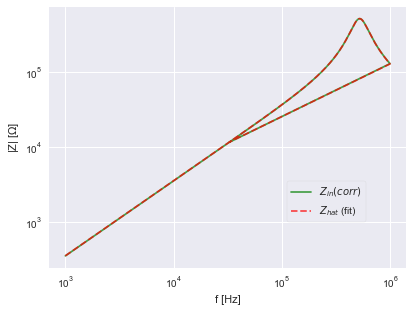

In [18]:
lockin.plot_fit_osc(osc_dict, double_ax = False, plot_range = None)

# Checking first results on HF heating

In [4]:
import sys
sys.path.append("..")

import os
import glob

%load_ext autoreload
%autoreload 2

from sicm.sicm import LockIn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Exctracting chunk 0 from file S:\UsersData\Martin\2019\01_Jan\18\session_20190118_103915_03\freq_sweep_250mVRMS_000\dev662_demods_3_sample_00000.csv.
Experiment time: 18/01/2019 10:41, # of points: 250


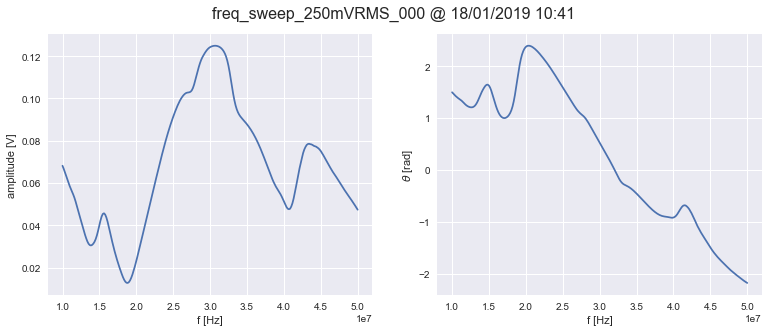

In [32]:
li0 = LockIn("S:\\UsersData\\Martin\\2019\\01_Jan\\18\\session_20190118_103915_03\\freq_sweep_250mVRMS_000",
            "dev662_demods_3_sample_00000.csv")
li0.plot()

Exctracting chunk 0 from file S:\UsersData\Martin\2019\01_Jan\18\session_20190118_103915_03\offset_sweep_250mVRMS_1MHz_000\dev662_demods_0_sample_00000.csv.
Experiment time: 18/01/2019 10:44, # of points: 200


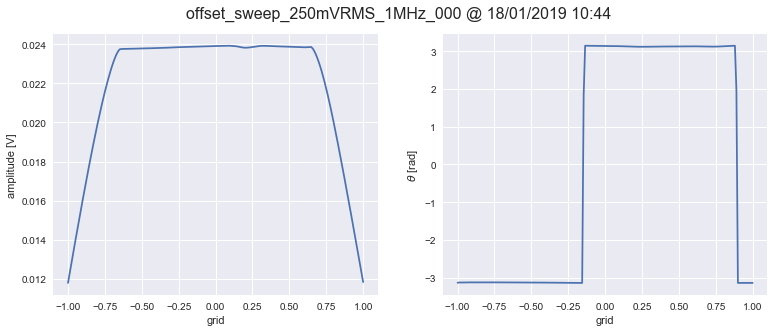

In [29]:
li1 = LockIn("S:\\UsersData\\Martin\\2019\\01_Jan\\18\\session_20190118_103915_03\\offset_sweep_250mVRMS_1MHz_000",
            "dev662_demods_0_sample_00000.csv")
li1.plot(keypairs = [("grid", "r"), ("grid", "phase")])

Exctracting chunk 0 from file S:\UsersData\Martin\2019\01_Jan\18\session_20190118_103915_03\offset_sweep_250mVRMS_30MHz_000\dev662_demods_0_sample_00000.csv.
Experiment time: 18/01/2019 10:45, # of points: 200


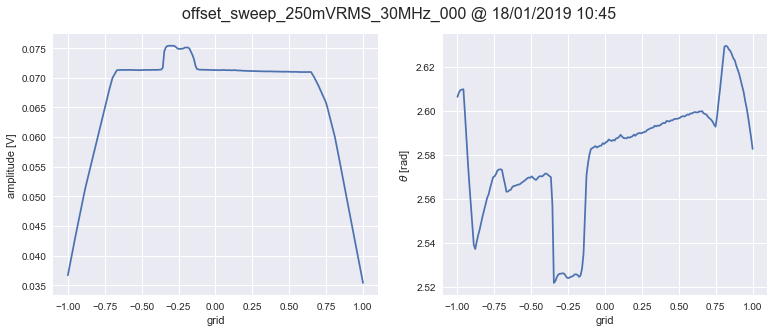

In [28]:
li2 = LockIn("S:\\UsersData\\Martin\\2019\\01_Jan\\18\\session_20190118_103915_03\\offset_sweep_250mVRMS_30MHz_000",
            "dev662_demods_0_sample_00000.csv")
li2.plot(keypairs = [("grid", "r"), ("grid", "phase")])

Exctracting chunk 0 from file S:\UsersData\Martin\2019\01_Jan\18\session_20190118_103915_03\offset_sweep_250mVRMS_50MHz_000\dev662_demods_0_sample_00000.csv.
Experiment time: 18/01/2019 10:45, # of points: 200


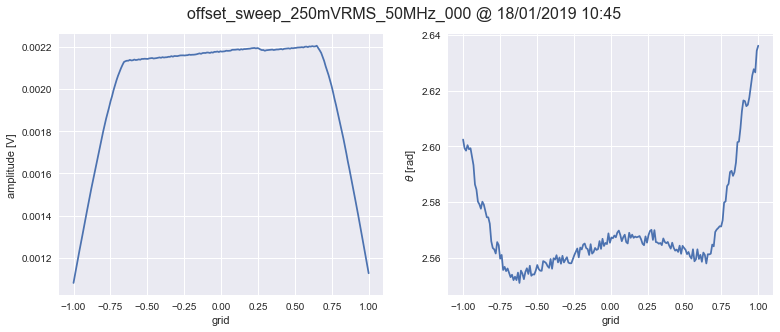

In [30]:
li3 = LockIn("S:\\UsersData\\Martin\\2019\\01_Jan\\18\\session_20190118_103915_03\\offset_sweep_250mVRMS_50MHz_000",
            "dev662_demods_0_sample_00000.csv")
li3.plot(keypairs = [("grid", "r"), ("grid", "phase")])

# Not used
-----

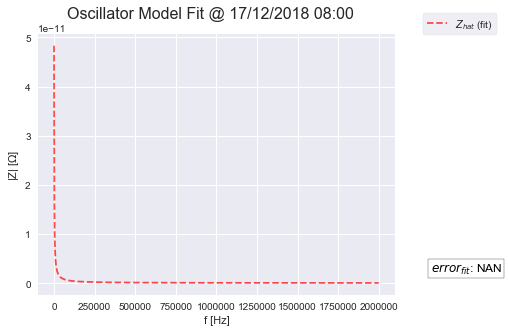

In [143]:
osc_dict["y_hat_corr"] = None
xx = np.append(osc_dict["x"], np.arange(1e6, 2e6, 1000)).flatten()
osc_dict["x"] = xx
guess = lockin.popt_osc
osc_dict["y_hat"] = LockIn._resonator_model(xx, *guess)
lockin.plot_fit_osc(osc_dict, xlog = False, double_ax = False, plot_range = None)